<a href="https://colab.research.google.com/github/jpscard/santander-customer-satisfaction_project_01/blob/main/Equipe4_Santander_Customer_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
bg_color = 'white'
ktcolors = ['#d0384e', '#ee6445', '#fa9b58', '#fece7c', '#fff1a8', '#f4faad', '#d1ed9c', '#97d5a4', '#5cb7aa', '#3682ba']
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':20,
            'figure.figsize':(5.0, 5.0),
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

#**2. Carregamento e visualização dos datasets** 

## **2.1 Carregando datasets**

In [2]:
# Carregando dados de treino.
train = pd.read_csv('/content/train.csv')

# Exibindo as primeiras linhas do dataframe de treino.
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
# Carregando dados de teste.

test = pd.read_csv('/content/test.csv')

# Exibindo as primeiras linhas.

test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


## **2.2 Informações e estatísticas sobre os dados de treino**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


# **3. Etapa de Pré-processamento**

# **3.1 Verificando valores nulos e duplicados nos dados de treino**

In [6]:
train.isnull().sum().sort_values()

ID_code    0
var_126    0
var_127    0
var_128    0
var_129    0
          ..
var_69     0
var_70     0
var_71     0
var_61     0
var_199    0
Length: 202, dtype: int64

In [7]:
train.isna().sum().sum()

0

In [8]:
train.duplicated().sum()

0

## **3.2 Redução e balanceamento dos dados de treino**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'amostra inicial dos dados de treino')

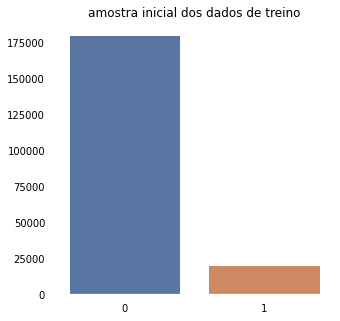

In [9]:
#gráfico da distribuição de saídas do dados de treino
x = train['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('amostra inicial dos dados de treino')

In [10]:
#reduzindo a quantidade de valores com saída 0, para reduzir vies
from sklearn.utils import resample
target_0 = train[train.target == 0]
target_1 = train[train.target == 1]
target_0_downsampled = resample(target_0, replace = False, n_samples = len(target_1), random_state = 13)

In [11]:
#tamanho de saídas de valor 0 antes de reduzir
target_0.shape


(179902, 202)

In [12]:
#tamanho após redução
target_0_downsampled.shape

(20098, 202)

In [13]:
#Equiparação das amostras de saída 0 e 1
downsampled = pd.concat([target_0_downsampled, target_1])
downsampled.target.value_counts()

0    20098
1    20098
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'amostra dos dados de treino balanceados')

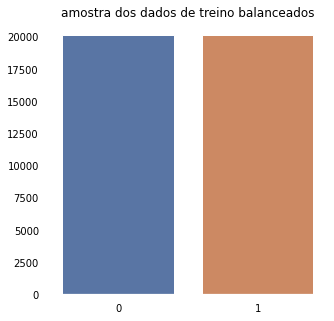

In [14]:
#gráfico da distribuição de saídas do dt de treino
x = downsampled['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('amostra dos dados de treino balanceados')

# **4.Treinamento**


## **4.1 Preparando entradas para o modelo**

In [15]:
#Removendo colunas ID e target do dataframe de treino reduzido
X = downsampled.drop(['ID_code', 'target'], axis=1)
y = downsampled['target']

## **4.2 Modelo de treinamento da rede**

In [16]:
from sklearn.naive_bayes import GaussianNB

steps = [("scaler", StandardScaler()),
         ("gnb", GaussianNB())]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=3)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[171  39]
 [ 32 160]]


0.8233830845771144

# **5. Aplicação do modelo de predição**

In [17]:
#Eliminando a coluna ID no conjunto de teste
X_target = test.drop(['ID_code'], axis=1)

In [18]:
#predição de elementos
steps = [("scaler", StandardScaler()),
         ("gnb", GaussianNB())]
pipeline = Pipeline(steps)

pipeline.fit(X, y)

y_pred = pipeline.predict(X_target)

# **6. Gerando arquivo para submissão**

In [19]:
output=pd.DataFrame({'ID_code': test.ID_code,'target': y_pred})
output.to_csv('submission.csv', index=False)
print("arquivo de submissão salvo")

arquivo de submissão salvo
